# Challenge CloudWalk - Risk Analyst

* Author: Bruno Marcelino
* Completion date: 13/08/2024

# Problem #1: Understand the Industry

#### Response 1-1:

1. Explain briefly the money flow, the information flow and the role of the main players in the payment industry.

* Fluxo de Dinheiro: é o processo de transferência de recursos entre agentes superavitários e deficitários em uma economia. Pode ser acelerado ou mitigado de diversas formas, seja por meio do efeito multiplicador do crédito em uma economia, aumento de preços causado pela inflação (aumenta demanda de moeda), criação de novos meios descentralizados de pagamento etc. No contexto da CloudWalk, o fluxo de dinheiro normalmente ocorre por meio de transferência de recursos entre contas bancárias, que podem envolver intermediários que garantem o processamento da transação (redes de cartões de crédito, processadores de pagamentos, bancos comerciais e órgãos públicos (BACEN no caso brasileiro)). 

* Fluxo de Informação: Envolve a troca de informações de pagamento entre instituições e os sistemas de pagamento, pra garantir a autenticidade e validação da transação, além do seu processamento.

* Principais participantes da indústria de pagamentos:

    * Consumidor: O indivíduo ou empresa que faz a compra ou o pagamento.
    * Vendedor: A empresa ou comerciante que recebe o pagamento em troca de bens ou serviços.
    * Instituições Financeiras: Os bancos ou instituições financeiras que mantêm as contas dos compradores e vendedores e facilitam a transferência de fundos.
    * Processador de Pagamentos: A empresa que gerencia o processamento das transações e assegura que os pagamentos sejam autorizados e liquidadas corretamente.
    * Rede de Cartões: Empresas como Visa, MasterCard e American Express que operam as redes de cartões de crédito e débito e facilitam a comunicação entre os bancos dos compradores e vendedores.
    * Adquirente: O banco ou instituição financeira que contrata o vendedor e processa os pagamentos recebidos.
    * Emissor: O banco ou instituição financeira que emite o cartão de crédito ou débito para o consumidor.


#### Response 1-2:

2. Explain the main differences between acquirer, sub-acquirer and payment gateway, and how the flow explained in the previous question changes for these players.

* Adquirente: Gerencia a conta comercial do comerciante e processa os pagamentos diretamente. Ele lida com a liquidação financeira e assume o risco das transações.
* Sub-Adquirente: Atua como intermediário entre o comerciante e o adquirente principal, facilitando a integração e suporte ao comerciante, mas repassando a responsabilidade financeira para o adquirente principal.
* Gateway de Pagamento: Captura e transmite informações de pagamento de forma segura entre o sistema de pagamento do comerciante e o adquirente, mas não lida diretamente com a liquidação financeira.

Quando um consumidor faz uma compra, o adquirente recebe a autorização do banco emissor (o banco do comprador) e garante que os fundos sejam transferidos do banco do comprador para o banco do vendedor. O adquirente assume o risco e a responsabilidade pela transação e garante que o comerciante receba o pagamento.

o sub-adquirente recebe as transações do comerciante e as encaminha para o adquirente principal. O adquirente principal então processa a transação e garante que os fundos sejam transferidos adequadamente. O sub-adquirente pode lidar com a comunicação e a integração técnica, mas o adquirente principal é quem realiza a liquidação financeira.

Quando um consumidor faz uma compra online ou por meio de um sistema de pagamento, o gateway de pagamento coleta as informações de pagamento e as envia para o adquirente ou processador de pagamentos. O adquirente, então, processa a transação e garante a transferência dos fundos. O gateway de pagamento é responsável por garantir que as informações de pagamento sejam criptografadas e seguras durante o processo.

#### Response 1-3:

3. Explain what chargebacks are, how they differ from a cancellation and what is their
connection with fraud in the acquiring world.

Um chargeback ocorre quando um consumidor solicita o estorno de uma transação de pagamento já realizada. Esse processo geralmente é iniciado através do banco emissor do cartão de crédito ou débito do consumidor. O chargeback pode ser solicitado por diversos motivos, como insatisfação com o produto ou serviço, fraude ou erro na cobrança.

# Problem #2: Case Study

A client sends you an email asking for a chargeback status. You check the system, and see that we have received his defense documents and sent them to the issuer, but the issuer has not accepted our defense. They claim that the cardholder continued to affirm that she did not receive the product, and our documents were not sufficient to prove otherwise. You respond to our client informing that the issuer denied the defense, and the next day he
emails you back, extremely angry and disappointed, claiming the product was delivered and that
this chargeback is not right.

Considering that the chargeback reason is “Product/Service not provided”, what would you do in
this situation?

#### Response 2:

Considerando uma situação de desentendimento entre as partes envolvidas no processo de pagamentos, diversas abordagens poderiam ser utilizadas. Vale ressaltar que, a princípio, não é possível afirmar nada a respeito de nenhum dos agentes até que se prove o contrário, logo coletaria informações sobre ambas as partes.

Considero interessante identificar quaisquer tipos de documentos e dados que possam fornecer indícios de que a compra foi entregue ou não, como recibos, dados de geolocalização fornecidos pela transportadora do produto, assinaturas do cliente etc. Também entraria em contato com o cliente para entender melhor a situação e solicitar provas de que a entrega foi realizada.

# Problem #3

Attached herein lies a spreadsheet with hypothetical transactional data. Imagine that you are trying to understand if there is any kind of suspicious behavior.

Please use the data provided on challenge 2 to test your solution. Consider that transactions with the flag
has_cbk = true are transactions with fraud chargebacks.
Your Anti-fraud must return a recommendation to approve or deny the transaction.

Metadata:

* User_id: id of the cardholders
* Device_id: divide used by the cardholder
* Has_cbk: transaction received a fraud chargeback or not

All the transactions occurred in a card not present environment.

#### Response 3-1:

1. Analyze the data provided and present your conclusions. What suspicious behaviors did you find? What led you to this conclusion? What actions would you take?

In [54]:
import pandas as pd 

raw_data = pd.read_csv("transactions.csv")
raw_data.info()
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      3199 non-null   int64  
 1   merchant_id         3199 non-null   int64  
 2   user_id             3199 non-null   int64  
 3   card_number         3199 non-null   object 
 4   transaction_date    3199 non-null   object 
 5   transaction_amount  3199 non-null   float64
 6   device_id           2369 non-null   float64
 7   has_cbk             3199 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 178.2+ KB


,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True
2,21320400,47759,14777,425850******7024,2019-12-01T22:22:43.021495,760.36,NaN,False
3,21320401,68657,69758,464296******3991,2019-12-01T21:59:19.797129,2556.13,NaN,True
4,21320402,54075,64367,650487******6116,2019-12-01T21:30:53.347051,55.36,860232.0,False


In [57]:
## Tratamento de dados
df = raw_data.copy() # Evita ter que salvar os dados novamente na memória

# Removendo "******" do card_number e convertendo a coluna para o tipo int
df["card_number"] = df["card_number"].str.replace("*", "").astype(int)

# Convertendo transaction_date para o tipo "datetime"
from datetime import date
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

# A coluna device_id contém vários valores faltantes. 
# Por ser uma chave estrangeira que não vamos utilizar, podemos apagá-la sem prejuízo ao contexto da análise
df.drop("device_id", axis=1, inplace=True)

# Converter alvo em variável binária (permite calcular estatísticas descritivas)
df["has_cbk"] = np.where(df["has_cbk"] == True, 1, 0) # Variável binária

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   transaction_id      3199 non-null   int64         
 1   merchant_id         3199 non-null   int64         
 2   user_id             3199 non-null   int64         
 3   card_number         3199 non-null   int64         
 4   transaction_date    3199 non-null   datetime64[ns]
 5   transaction_amount  3199 non-null   float64       
 6   has_cbk             3199 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 175.1 KB


,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,has_cbk
0,21320398,29744,97051,4345059116,2019-12-01 23:16:32.812632,374.56,0
1,21320399,92895,2708,4444564210,2019-12-01 22:45:37.873639,734.87,1
2,21320400,47759,14777,4258507024,2019-12-01 22:22:43.021495,760.36,0
3,21320401,68657,69758,4642963991,2019-12-01 21:59:19.797129,2556.13,1
4,21320402,54075,64367,6504876116,2019-12-01 21:30:53.347051,55.36,0


In [58]:
df.describe()

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,has_cbk
count,3.199000e+03,3199.000000,3199.000000,3.199000e+03,3199,3199.000000,3199.000000
mean,2.132200e+07,48771.128790,50891.077212,5.057848e+09,2019-11-22 12:47:02.242350336,767.812904,0.122226
min,2.132040e+07,16.000000,6.000000,4.593833e+07,2019-11-01 01:27:15.811098,1.220000,0.000000
25%,2.132120e+07,23426.000000,24267.500000,4.642986e+09,2019-11-18 18:35:57.557812992,205.235000,0.000000
50%,2.132200e+07,48752.000000,52307.000000,5.232845e+09,2019-11-23 13:50:58.758107904,415.940000,0.000000
75%,2.132280e+07,73915.000000,76837.000000,5.447320e+09,2019-11-28 21:51:06.055557376,981.680000,0.000000
max,2.132360e+07,99799.000000,99974.000000,4.532111e+10,2019-12-01 23:16:32.812632,4097.210000,1.000000
std,9.236161e+02,29100.360839,29515.282827,1.340678e+09,NaN,889.095904,0.327598


In [63]:
print("Quantidade de cartões diferentes analisados:", len(df["card_number"].unique().tolist()))
print("Total da amostra:", len(df))

Quantidade de cartões diferentes analisados: 2925
Total da amostra: 3199


Podemos notar comportamentos que dizem respeito à distribuição das variáveis, dentre eles:

* Amostra desbalanceada (12% das transações são fraudes)
* Alguns cartões se repetem na amostra
* Pode haver correlação entre o horário da transação e a ocorrência de chargeback
* Valor da transação varia em um intervalo controlado (+- 0 a 4000)

#### Response 3-2:

2. In addition to the spreadsheet data, what other data would you consider to find patterns of possible fraudulent behavior?

Nesse cenário de prevenção de fraudes, eu gostaria de utilizar dados geográficos para regionalizar a análise e características dos clientes (com cuidado, pois podem ser dados sensíveis) para identificar padrões clusterizáveis.

#### Response 3-3:

3. Considering your conclusions, what would you further suggest in order to prevent frauds and/or chargebacks? 

Como futuras ferramentas que contribuam com a melhor estimação do modelo, seriam feitos:

* Mais testes com modelos lineares e não-lineares
* Otimização de hiperparâmetros e validação cruzada com GridSearchCV
* Estudo da distribuição das variáveis com t-SNE, matriz de correlação e histogramas
* Criação de novas variáveis com base nas antigas
* Encoding das variáveis (criação de variáveis dummy, categóricas etc.) 

Possuo conheicmento de todas essas ferramentas, mas não foi possível adicioná-las para tornar a análise mais robusta. Um detalhamento de todas essas ferramentas já foi feito por mim para utilização em modelos passados, e pode ser encontrado no [meu GitHub](https://github.com/bruno-marcelino10/my-docs/tree/main/python).

#### Response 3-4:

4. Create a simple anti-fraud.

O modelo a ser utilizado é uma árvore de decisão que é um mapa dos possíveis resultados de uma série de escolhas relacionadas, que podem ser usadas tanto para conduzir diálogos informais quanto para mapear um algoritmo que prevê a melhor escolha, matematicamente. Podemos utilizá-las tanto em tarefas de classificação quanto de regressão.

Uma árvore de decisão geralmente começa com um único nó, que se divide em possíveis resultados. Cada um desses resultados leva a nós adicionais, que se ramificam em outras possibilidades. Assim, cria-se uma forma de árvore que permite realizar uma previsão para um conjunto de dados. 

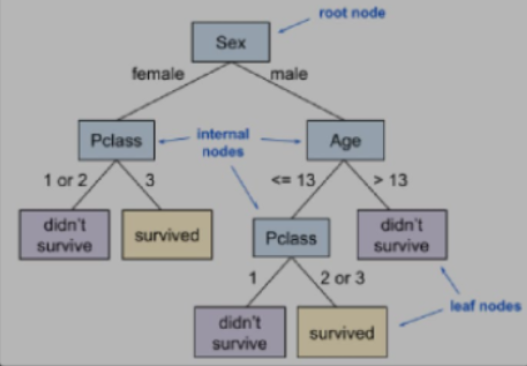

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, RocCurveDisplay

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering (extraindo datas para avaliar correlação com o resultado)
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day
df['hour'] = df['transaction_date'].dt.hour
df['minute'] = df['transaction_date'].dt.minute

df.drop(["transaction_id", "merchant_id", "user_id", "card_number", "transaction_date"], axis=1, inplace=True) # Dropando colunas irrelevantes
df.dropna(inplace = True) # Assegurando que dados faltantes foram apagados
df.head() # Alvo Binário: has_cbk

# Criando conjuntos de treino e teste
X = df.drop("has_cbk", axis = 1)
y = df["has_cbk"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [46]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

y_proba_train = modelo.predict_proba(X_train)[:,1]
y_proba_test = modelo.predict_proba(X_test)[:,1]

# Avaliação
print(confusion_matrix(y_test, y_pred_test))
print()
print(accuracy_score(y_test, y_pred_test))
print()
print(classification_report(y_test, y_pred_test))

[[625  64]
 [ 71  40]]

0.83125

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       689
           1       0.38      0.36      0.37       111

    accuracy                           0.83       800
   macro avg       0.64      0.63      0.64       800
weighted avg       0.83      0.83      0.83       800



AUC - Teste : 0.6337360582643601


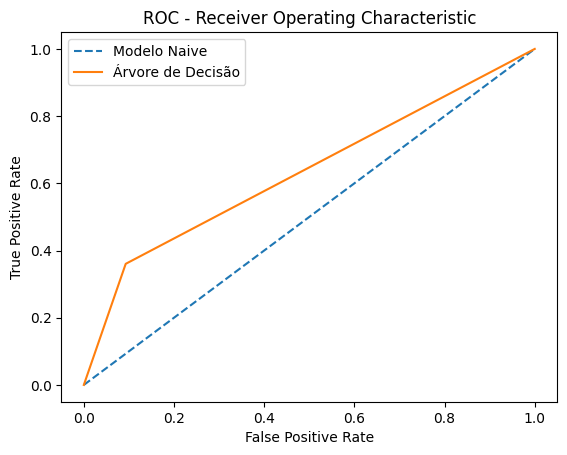

In [48]:
# Calculando a AUC (Area Under the Curve)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
roc_auc = auc(fpr, tpr)
print("AUC - Teste :", roc_auc)

# Criando Curva ROC
plt.plot([0,1], [0,1], linestyle = '--', label = 'Modelo Naive')
plt.plot(fpr, tpr, label = 'Árvore de Decisão')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC - Receiver Operating Characteristic")
plt.legend()
plt.show()